In [1]:
import pandas as pd

In [2]:
!ls

NHEFS.xls                               non-normal_to_normal_distribution.ipynb
conf_int_qq_plots.png                   normality_check.ipynb
confidence_interval.ipynb


In [3]:
df = pd.read_excel('NHEFS.xls')

In [4]:
df.head()

,seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
0,233,0,0,NaN,NaN,NaN,175.0,96.0,0,42,...,2,NaN,197.0,0.0,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381
1,235,0,0,NaN,NaN,NaN,123.0,80.0,0,36,...,2,NaN,301.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969
2,244,0,0,NaN,NaN,NaN,115.0,75.0,1,56,...,0,2.0,157.0,0.0,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251
3,245,0,1,85.0,2.0,14.0,148.0,78.0,0,68,...,2,NaN,174.0,0.0,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993
4,252,0,0,NaN,NaN,NaN,118.0,77.0,0,40,...,2,NaN,216.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969


In [5]:
df.columns

Index(['seqn', 'qsmk', 'death', 'yrdth', 'modth', 'dadth', 'sbp', 'dbp', 'sex',
       'age', 'race', 'income', 'marital', 'school', 'education', 'ht', 'wt71',
       'wt82', 'wt82_71', 'birthplace', 'smokeintensity', 'smkintensity82_71',
       'smokeyrs', 'asthma', 'bronch', 'tb', 'hf', 'hbp', 'pepticulcer',
       'colitis', 'hepatitis', 'chroniccough', 'hayfever', 'diabetes', 'polio',
       'tumor', 'nervousbreak', 'alcoholpy', 'alcoholfreq', 'alcoholtype',
       'alcoholhowmuch', 'pica', 'headache', 'otherpain', 'weakheart',
       'allergies', 'nerves', 'lackpep', 'hbpmed', 'boweltrouble', 'wtloss',
       'infection', 'active', 'exercise', 'birthcontrol', 'pregnancies',
       'cholesterol', 'hightax82', 'price71', 'price82', 'tax71', 'tax82',
       'price71_82', 'tax71_82'],
      dtype='object')

## 1. Grap test
#### 1. Q-Q Plot

If our variable follows a normal distribution, the quantiles of our variable must be perfectly in line with the “theoretical” normal quantiles: a straight line on the QQ Plot tells us we have a normal distribution.

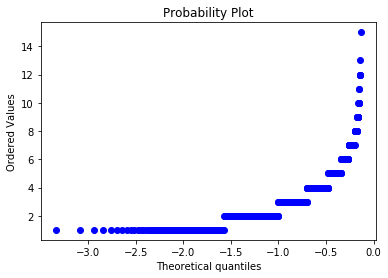

In [7]:
import numpy as np
import scipy.stats as stats
import pylab

stats.probplot(df['pregnancies'], dist='norm', plot=pylab)
pylab.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:393: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:394: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


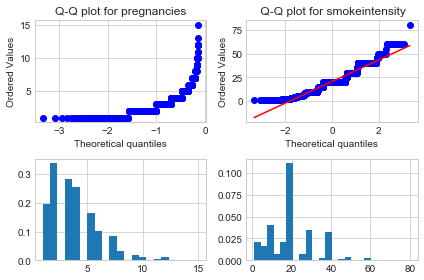

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(6, 4))
stats.probplot(df['pregnancies'], dist=stats.norm, plot=axes[0, 0])
stats.probplot(df['smokeintensity'], dist=stats.norm, plot=axes[0, 1])

axes[0, 0].set_title('Q-Q plot for pregnancies')
axes[0, 1].set_title(' Q-Q plot for smokeintensity')

axes[1, 0].hist(df['pregnancies'], density=True, bins='auto')
axes[1, 1].hist(df['smokeintensity'], density=True, bins='auto')

fig.tight_layout()

#### 2. [Box Plot](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html)
If your variable has a normal distribution, we should see the mean and median in the center

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3abd45828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3abd45ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3abd454a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3abd535c0>],
 'fliers': [],
 'means': []}

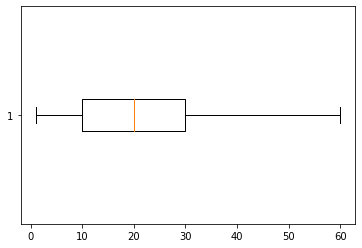

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df['smokeintensity'], showfliers=False, vert=False,)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


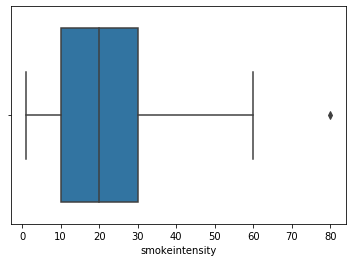

In [9]:
import seaborn as sns
ax = sns.boxplot(df['smokeintensity'])

#### 3. [Histogram](https://www.gaussianwaves.com/2020/06/using-matplotlib-histogram-in-python/)

If your variable has a normal distribution, we should see a bell curve.

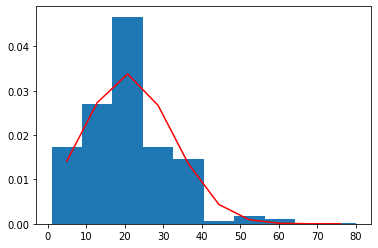

In [10]:
import scipy.stats as stats

(values, bins, _) = plt.hist(df['smokeintensity'],  density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
mu = np.mean(df['smokeintensity'])
sigma = df['smokeintensity'].std()

pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) #Compute probability density function
plt.plot(bin_centers, pdf, label="PDF",color='red')

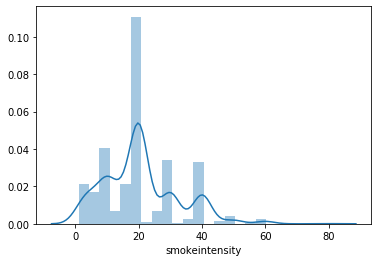

In [13]:
import seaborn as sns
ax = sns.distplot(df['smokeintensity'])

## 2. Statistical Test for Normality
#### 1. Shapiro-Wilk Test
It is the most powerful test to check the normality of a variable. It was proposed in 1965 by Samuel Sanford Shapiro and Martin Wilk.

- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

In [62]:
from scipy.stats import shapiro

stats, p = shapiro(df['smokeintensity'])
print(p)

8.530235502077642e-28


#### 2. D’Agostino’s K-squared test
D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis. It was named by Ralph D’Agostino.
- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

In [38]:
from scipy.stats import normaltest

stats, p = normaltest(df['smokeintensity'])
print(p)

4.222727806537973e-32


#### 3. Anderson-Darling Normality Test
Anderson-Darling Normality Test is another general normality tests designed to determine if the data comes from a specified distribution, in our case, the normal distribution. It was developed in 1952 by Theodore Anderson and Donald Darling.


It gives a range of critical values, at which the null hypothesis can be failed to rejected if the calculated statistic is less than the critical value.

In [39]:
from scipy.stats import anderson

results = anderson(df['smokeintensity'])

In [42]:
results

AndersonResult(statistic=47.44436452032505, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [41]:
print(results.statistic)

47.44436452032505


#### 4. Chi-Square Normality Test

- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

In [44]:
from scipy.stats import chisquare

statistic, pvalue = chisquare(df['smokeintensity'])
print(pvalue)

0.0


#### 5. Lilliefors Test for Normality
The Lilliefors test is a normality test based on the Kolmogorov–Smirnov test(later). The difference is that in the Lilliefors test, it is accepted that the mean and variance of the population distribution are estimated rather than pre-specified by the user.

As all the above methods, this test is used to check if the data come from a normal distribution. It is named after Hubert Lilliefors, professor of statistics at George Washington University.

Although Lilliefors is an improvement to the KS test it’s power is still lower than the Shapiro Wilk test.


- If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

In [50]:
from statsmodels.stats.diagnostic import lilliefors

stats, p = lilliefors(df['smokeintensity'])
print(p)

2.868962893333416e-256


#### 6. Jarque–Bera test for Normality
The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.

Note: this test only works for a large enough number of data samples(>2000)

In [51]:
from scipy.stats import jarque_bera

stats, p = jarque_bera(df['smokeintensity'])
print(p)

0.0


#### 7. Kolmogorov-Smirnov test for Normality
Performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit. The one-sample test performs a test of the distribution F(x) of an observed random variable against a given distribution G(x) (i.e. a normal distribution).


The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

In [49]:
from scipy.stats import kstest

stats, p = kstest(df['smokeintensity'], 'norm')
print(p)

0.0


## Reference

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
    
https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93